In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime as dt

from tools_fast import *
from hc_graph import hc_stock
sns.set()

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [3]:
prices = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU','BNPIFIT',
                            'BNPIFGE', 'BNPIFFR', 'BNPIFSP']].loc["2007":].ffill()

prices_all = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU',
                            'BNPIFUS', 'BNPIFJP', 'BNPIFCN', 'BNPIFFR', 'BNPIFGE','BNPIFGB', 'BNPIFCH', 'BNPIFKR',
                            'BNPIFUSC', 'BNPIFBR', 'BNPIFAU', 'BNPIFHK', 'BNPIFTW', 'BNPIFIT', 'BNPIFSP',
                            'BNPIFSW', 'BNPIFNE', 'BNPIFRU', 'BNPIFEM', 'BNPIFJT', 'BPFXEUR1', 'BPFXGBP1', 'BPFXCHF1',
                            'BPFXJPY1', 'BPFXAUD1', 'BPFXNZD1', 'BPFXNOK1', 'BPFXSEK1', 'BPFXCAD1', 'BPFXCZK1',
                            'BPFXPLN1', 'BPFXHUF1', 'BPFXTRY1', 'BPFXZAR1', 'BPFXSGD1', 'BPFXMXN1', 'BPFXINR1',
                            'BPFXKRW1', 'BPFXPHP1', 'BPFXTWD1', 'BPFXBRL1', 'BPFXCLP1', 'BPFXCOP1']]

prices_all = prices_all.loc["2007":].ffill()
returns = prices.resample("7D").first().pct_change().dropna()
returns_all = prices_all.resample("7D").first().pct_change().dropna()

In [4]:
sx5e = returns_all[["BNPIFEU"]]
bch = returns.drop("BNPIFEU", axis=1)
bch_all = returns_all.drop("BNPIFEU", axis=1)

size = 52
freq = 4

In [5]:
%%time
df_weight = ols_regression(sx5e, bch, size, freq)
df_weight_all = ols_regression(sx5e, bch_all, size, freq)

prices_for_track = prices.loc[df_weight.index[0]:].drop("BNPIFEU", axis=1)
prices_for_track_all = prices_all.loc[df_weight_all.index[0]:].drop("BNPIFEU", axis=1)

replication = make_track(prices_for_track, df_weight)
replication_all = make_track(prices_for_track_all, df_weight_all)

df_res = prices.loc[replication.index][["BNPIFEU"]]
df_res["OLS"] = replication
df_res["OLS all"] = replication_all

Wall time: 26.1 s


In [6]:
%%time
df_weight_ridge = ridge_regression(sx5e, bch, size, freq, l=1e-3)
df_weight_ridge_all = ridge_regression(sx5e, bch_all, size, freq, l=1e-3)

replication_ridge = make_track(prices_for_track, df_weight_ridge)
replication_ridge_all = make_track(prices_for_track_all, df_weight_ridge_all)

df_res["Ridge"] = replication_ridge
df_res["Ridge all"] = replication_ridge_all

Wall time: 21.5 s


In [7]:
%%time
df_weight_lasso = lasso_regression(sx5e, bch, size, freq, l=5e-5)
df_weight_lasso_all = lasso_regression(sx5e, bch_all, size, freq, l=5e-5)

replication_lasso = make_track(prices_for_track, df_weight_lasso)
replication_lasso_all = make_track(prices_for_track_all, df_weight_lasso_all)

df_res["Lasso"] = replication_lasso
df_res["Lasso all"] = replication_lasso_all

Wall time: 5.21 s


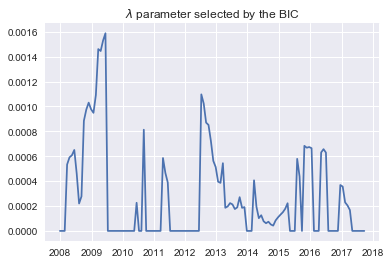

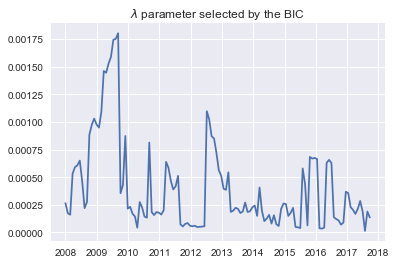

Wall time: 16.5 s


In [8]:
%%time
df_weight_lasso_bic, _ = lasso_regression_ic(sx5e, bch, size, freq, criterion='bic')
df_weight_lasso_bic_all, df_lambda_bic = lasso_regression_ic(sx5e, bch_all, size, freq, criterion='bic')

replication_lasso_bic = make_track(prices_for_track, df_weight_lasso_bic)
replication_lasso_bic_all = make_track(prices_for_track_all, df_weight_lasso_bic_all)

df_res["Lasso BIC"] = replication_lasso_bic
df_res["Lasso BIC all"] = replication_lasso_bic_all

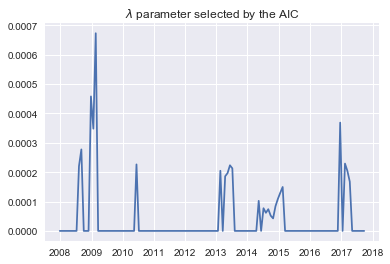

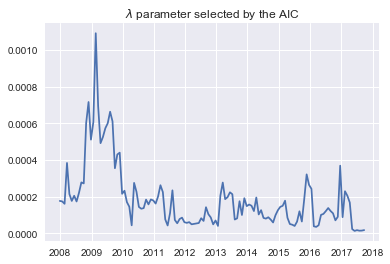

Wall time: 9.48 s


In [9]:
%%time
df_weight_lasso_aic, _ = lasso_regression_ic(sx5e, bch, size, freq, criterion='aic')
df_weight_lasso_aic_all, df_lambda_aic = lasso_regression_ic(sx5e, bch_all, size, freq, criterion='aic')

replication_lasso_aic = make_track(prices_for_track, df_weight_lasso_aic)
replication_lasso_aic_all = make_track(prices_for_track_all, df_weight_lasso_aic_all)

df_res["Lasso AIC"] = replication_lasso_aic
df_res["Lasso AIC all"] = replication_lasso_aic_all

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1AD5E710> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
c:\program files (x86)\python36-32\lib\site-packages\matplotlib\legend.py:590: UserWarning: The handle <matplotlib.lines.Line2D object at 0x18856450> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


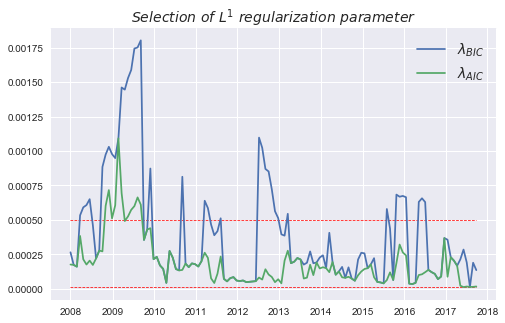

In [10]:
temp = 1 + 0 * df_lambda_aic
ax = (1e-5 * temp)['$\lambda$'].plot(label='_nolegend_', linestyle='--', legend=True, color='r', linewidth=0.75)
(5e-4 * temp)['$\lambda$'].plot(label='_nolegend_', linestyle='--', legend=True, ax=ax, color='r', linewidth=0.75)
df_lambda_bic['$\lambda$'].plot(label='$\lambda_{BIC}$', legend=True, ax=ax, figsize=(8,5))
df_lambda_aic['$\lambda$'].plot(label='$\lambda_{AIC}$', legend=True, ax=ax)

ax.set_title('$Selection \ of \ L^1 \ regularization \ parameter$', fontsize=14)
plt.legend(prop={'size': 14})

In [11]:
%%time
df_weight_kalman = kalman_filter(sx5e, bch, freq, sigma_weight=0.5, sigma_return=0.1)
df_weight_kalman_all = kalman_filter(sx5e, bch_all, freq, sigma_weight=0.5, sigma_return=0.1)

prices_for_track_kalman = prices.loc[df_weight_kalman.index[0]:].drop("BNPIFEU", axis=1)
prices_for_track_all_kalman = prices_all.loc[df_weight_kalman_all.index[0]:].drop("BNPIFEU", axis=1)

replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman).loc[df_weight.index[0]:]
replication_kalman_all = make_track(prices_for_track_all_kalman, df_weight_kalman_all).loc[df_weight.index[0]:]

df_res["Kalman"] = replication_kalman
df_res["Kalman all"] = replication_kalman_all

Wall time: 673 ms


In [12]:
df_res = df_res / df_res.iloc[0]

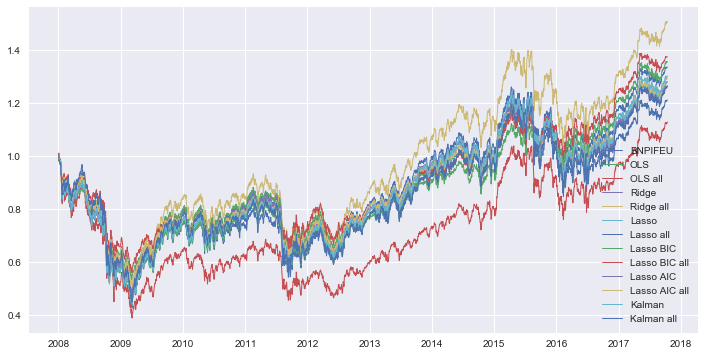

In [13]:
df_res.plot(figsize=(12,6),linewidth=1)

In [14]:
g = hc_stock(df_res)
g.plot()

In [15]:
df_res.pct_change().corr(method="pearson")

BNPIFEU       OLS   OLS all     Ridge  Ridge all     Lasso  \
BNPIFEU        1.000000  0.987041  0.941274  0.983995   0.975645  0.986774   
OLS            0.987041  1.000000  0.954355  0.996363   0.987043  0.999829   
OLS all        0.941274  0.954355  1.000000  0.950701   0.964821  0.954697   
Ridge          0.983995  0.996363  0.950701  1.000000   0.987877  0.996248   
Ridge all      0.975645  0.987043  0.964821  0.987877   1.000000  0.986729   
Lasso          0.986774  0.999829  0.954697  0.996248   0.986729  1.000000   
Lasso all      0.986039  0.998861  0.957408  0.995507   0.989271  0.998965   
Lasso BIC      0.965853  0.979966  0.934291  0.974163   0.966900  0.979300   
Lasso BIC all  0.968848  0.982414  0.937965  0.977360   0.968650  0.982603   
Lasso AIC      0.984376  0.998423  0.952475  0.994447   0.984756  0.998402   
Lasso AIC all  0.982425  0.996960  0.950674  0.993174   0.983298  0.997070   
Kalman         0.987078  0.999252  0.951644  0.996450   0.986628  0.999092   
Kalman all     0.980730  0.991853  0.955369  0.990399   0.989651  0.991630   

               Lasso all  Lasso BIC  Lasso BIC all  Lasso AIC  Lasso AIC all  \
BNPIFEU         0.986039   0.965853       0.968848   0.984376       0.982425   
OLS             0.998861   0.979966       0.982414   0.998423       0.996960   
OLS all         0.957408   0.934291       0.937965   0.952475       0.950674   
Ridge           0.995507   0.974163       0.977360   0.994447       0.993174   
Ridge all       0.989271   0.966900       0.968650   0.984756       0.983298   
Lasso           0.998965   0.979300       0.982603   0.998402       0.997070   
Lasso all       1.000000   0.979173       0.982424   0.997341       0.996348   
Lasso BIC       0.979173   1.000000       0.991879   0.978893       0.982562   
Lasso BIC all   0.982424   0.991879       1.000000   0.980374       0.987182   
Lasso AIC       0.997341   0.978893       0.980374   1.000000       0.997172   
Lasso AIC all   0.996348   0.982562       0.987182   0.997172       1.000000   
Kalman          0.998106   0.978053       0.980645   0.997522       0.996330   
Kalman all      0.992925   0.973050       0.976212   0.988834       0.989732   

                 Kalman  Kalman all  
BNPIFEU        0.987078    0.980730  
OLS            0.999252    0.991853  
OLS all        0.951644    0.955369  
Ridge          0.996450    0.990399  
Ridge all      0.986628    0.989651  
Lasso          0.999092    0.991630  
Lasso all      0.998106    0.992925  
Lasso BIC      0.978053    0.973050  
Lasso BIC all  0.980645    0.976212  
Lasso AIC      0.997522    0.988834  
Lasso AIC all  0.996330    0.989732  
Kalman         1.000000    0.992547  
Kalman all     0.992547    1.000000

In [16]:
df_res.pct_change().corr(method="kendall")

BNPIFEU       OLS   OLS all     Ridge  Ridge all     Lasso  \
BNPIFEU        1.000000  0.912106  0.806289  0.895170   0.876359  0.911170   
OLS            0.912106  1.000000  0.822962  0.943111   0.904469  0.991581   
OLS all        0.806289  0.822962  1.000000  0.814377   0.848657  0.822814   
Ridge          0.895170  0.943111  0.814377  1.000000   0.908960  0.940631   
Ridge all      0.876359  0.904469  0.848657  0.908960   1.000000  0.902493   
Lasso          0.911170  0.991581  0.822814  0.940631   0.902493  1.000000   
Lasso all      0.908898  0.977202  0.827559  0.935149   0.909298  0.980454   
Lasso BIC      0.881079  0.934234  0.799594  0.894865   0.869162  0.934706   
Lasso BIC all  0.882600  0.929734  0.802309  0.892933   0.868737  0.933378   
Lasso AIC      0.908183  0.986799  0.820879  0.936407   0.900249  0.983315   
Lasso AIC all  0.905310  0.970871  0.819340  0.927701   0.895929  0.974082   
Kalman         0.912962  0.986258  0.823014  0.945207   0.905612  0.982783   
Kalman all     0.894245  0.930459  0.839027  0.913278   0.916674  0.929755   

               Lasso all  Lasso BIC  Lasso BIC all  Lasso AIC  Lasso AIC all  \
BNPIFEU         0.908898   0.881079       0.882600   0.908183       0.905310   
OLS             0.977202   0.934234       0.929734   0.986799       0.970871   
OLS all         0.827559   0.799594       0.802309   0.820879       0.819340   
Ridge           0.935149   0.894865       0.892933   0.936407       0.927701   
Ridge all       0.909298   0.869162       0.868737   0.900249       0.895929   
Lasso           0.980454   0.934706       0.933378   0.983315       0.974082   
Lasso all       1.000000   0.928119       0.928362   0.971770       0.966760   
Lasso BIC       0.928119   1.000000       0.967786   0.938777       0.940476   
Lasso BIC all   0.928362   0.967786       1.000000   0.929499       0.946625   
Lasso AIC       0.971770   0.938777       0.929499   1.000000       0.974037   
Lasso AIC all   0.966760   0.940476       0.946625   0.974037       1.000000   
Kalman          0.972746   0.928393       0.925600   0.976279       0.965447   
Kalman all      0.932614   0.893588       0.894626   0.925663       0.922993   

                 Kalman  Kalman all  
BNPIFEU        0.912962    0.894245  
OLS            0.986258    0.930459  
OLS all        0.823014    0.839027  
Ridge          0.945207    0.913278  
Ridge all      0.905612    0.916674  
Lasso          0.982783    0.929755  
Lasso all      0.972746    0.932614  
Lasso BIC      0.928393    0.893588  
Lasso BIC all  0.925600    0.894626  
Lasso AIC      0.976279    0.925663  
Lasso AIC all  0.965447    0.922993  
Kalman         1.000000    0.932426  
Kalman all     0.932426    1.000000

In [17]:
returns_track = df_res.pct_change().dropna()
feu = returns_track['BNPIFEU']
returns_track = returns_track.drop('BNPIFEU', axis=1)
df = pd.DataFrame()
df['Tracking error'] = (returns_track.T - feu.values).std(axis=1)
df['R-squared'] = 1 - (returns_track.T - feu.values).var(axis=1) / feu.values.var()
df

Tracking error  R-squared
OLS                  0.002462   0.973566
OLS all              0.005285   0.878158
Ridge                0.002895   0.963436
Ridge all            0.003349   0.951081
Lasso                0.002586   0.970833
Lasso all            0.002680   0.968672
Lasso BIC            0.004579   0.908531
Lasso BIC all        0.004956   0.892851
Lasso AIC            0.002753   0.966929
Lasso AIC all        0.003396   0.949691
Kalman               0.002455   0.973705
Kalman all           0.002967   0.961610

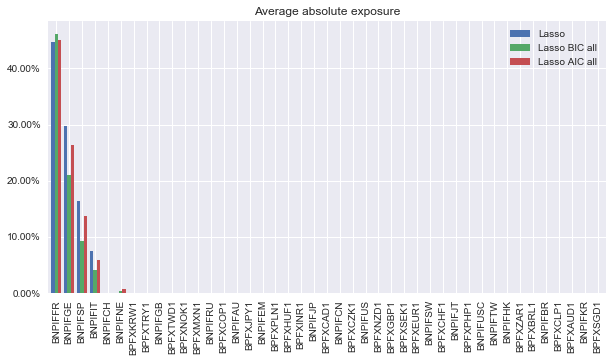

In [18]:
weight = pd.DataFrame(data={'Lasso all': np.abs(df_weight_lasso_all).mean(axis=0).sort_values(ascending=False)})
weight.insert(0, 'OLS', np.abs(df_weight).mean(axis=0))
weight.insert(1, 'OLS all', np.abs(df_weight_all).mean(axis=0))
weight.insert(2, 'Lasso', np.abs(df_weight_lasso).mean(axis=0))
weight['Ridge'] = np.abs(df_weight_ridge).mean(axis=0)
weight['Ridge all'] = np.abs(df_weight_ridge_all).mean(axis=0)
weight['Kalman'] = np.abs(df_weight_kalman).mean(axis=0)
weight['Kalman all'] = np.abs(df_weight_kalman_all).mean(axis=0)
weight['Lasso BIC all'] = np.abs(df_weight_lasso_bic_all).mean(axis=0)
weight['Lasso AIC all'] = np.abs(df_weight_lasso_aic_all).mean(axis=0)
ax = weight[['Lasso', 'Lasso BIC all', 'Lasso AIC all']].plot(kind='bar', title='Average absolute exposure', figsize=(10, 5), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()

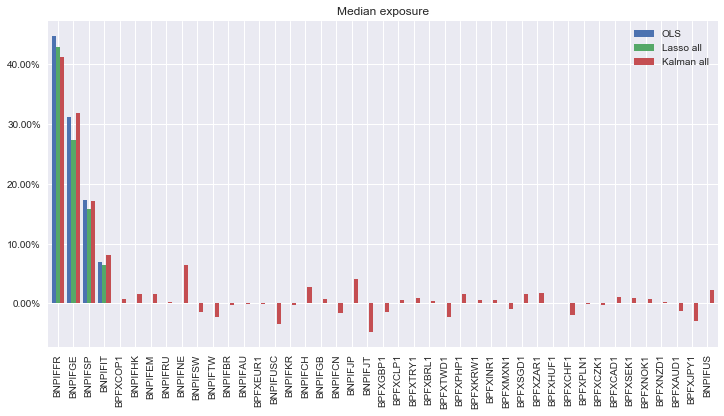

In [19]:
weight = pd.DataFrame(data={'Lasso all': (df_weight_lasso_all).median(axis=0).sort_values(ascending=False)})
weight.insert(0, 'OLS', (df_weight).median(axis=0))
weight.insert(1, 'OLS all', (df_weight_all).median(axis=0))
weight.insert(2, 'Lasso', (df_weight_lasso).median(axis=0))
weight['Ridge'] = (df_weight_ridge).median(axis=0)
weight['Ridge all'] = (df_weight_ridge_all).median(axis=0)
weight['Kalman'] = (df_weight_kalman).median(axis=0)
weight['Kalman all'] = (df_weight_kalman_all).median(axis=0)
ax = weight[['OLS', 'Lasso all', 'Kalman all']].plot(kind='bar', title='Median exposure', figsize=(12, 6), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()

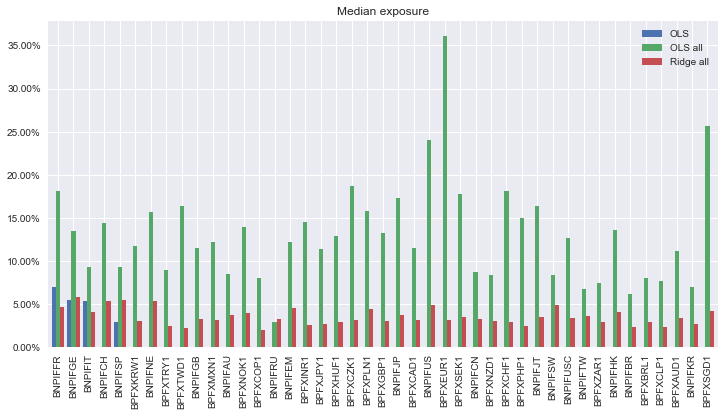

In [20]:
weight = pd.DataFrame(data={'Lasso all': (df_weight_lasso_all).std(axis=0).sort_values(ascending=False)})
weight.insert(0, 'OLS', (df_weight).std(axis=0))
weight.insert(1, 'OLS all', (df_weight_all).std(axis=0))
weight.insert(2, 'Lasso', (df_weight_lasso).std(axis=0))
weight['Ridge'] = (df_weight_ridge).std(axis=0)
weight['Ridge all'] = (df_weight_ridge_all).std(axis=0)
weight['Kalman'] = (df_weight_kalman).std(axis=0)
weight['Kalman all'] = (df_weight_kalman_all).std(axis=0)
ax = weight[['OLS', 'OLS all', 'Ridge all']].plot(kind='bar', title='Median exposure', figsize=(12, 6), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()

# MLE Kalman

In [27]:
%%time
df_weight_kalman = kalman_filter(sx5e, bch, freq, sigma_weight=0.5, sigma_return=0.1)
prices_for_track_kalman = prices.loc[df_weight_kalman.index[0]:].drop("BNPIFEU", axis=1)
replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman).loc[df_weight.index[0]:]
df_res_ = prices.loc[replication.index][["BNPIFEU"]]
df_res_["Kalman"] = replication_kalman

Wall time: 284 ms


In [36]:
%%time
for tau in [0.05, 0.1, 0.2, 0.5, 1.]:
    for freq_ in [1, 4, 10, 26, 52]:
        df_weight_kalman, _ = ml_kalman_filter(sx5e, bch, freq_, tau=tau)
        prices_for_track_kalman = prices.loc[df_weight_kalman.index[0]:].drop("BNPIFEU", axis=1)
        replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman).loc[df_weight.index[0]:]
        df_res_["ML Kalman {}-day rebalancing $\\tau={}$".format(freq_, tau)] = replication_kalman
#     df_res_["ML Kalman $\\tau={}$".format(tau)] = replication_kalman

Wall time: 2min 37s


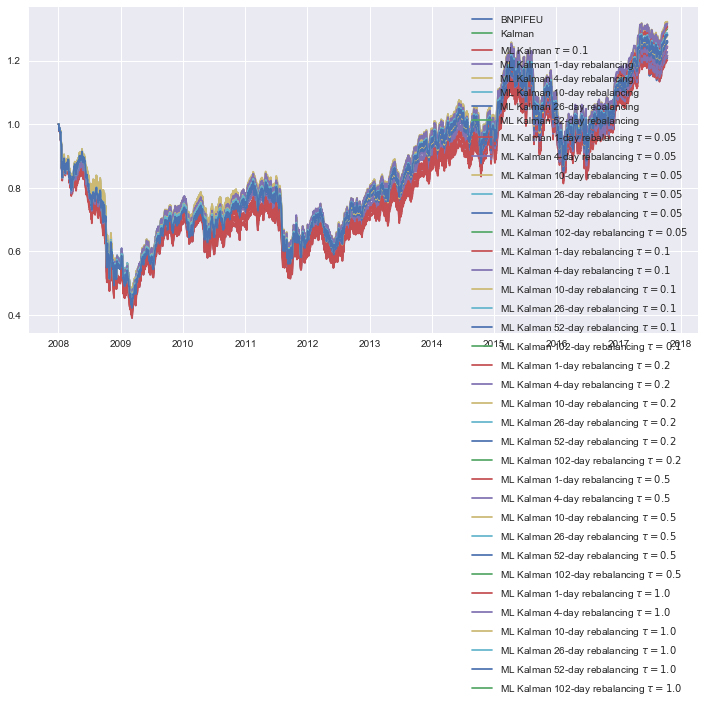

In [37]:
df_res_ = df_res_ / df_res_.iloc[0]
df_res_.plot(figsize=(12,6))

In [38]:
g = hc_stock(df_res_)
g.plot()

In [45]:
df_res_

BNPIFEU    Kalman  ML Kalman $\tau=0.1$  \
2008-01-02  1.000000  1.000000              1.000000   
2008-01-03  0.997791  0.999136              0.999517   
2008-01-04  0.984902  0.980215              0.980094   
2008-01-07  0.986786  0.982969              0.982816   
2008-01-08  0.989873  0.987425              0.987589   
2008-01-09  0.980572  0.980679              0.980410   
2008-01-10  0.976244  0.973183              0.972740   
2008-01-11  0.973602  0.972073              0.971479   
2008-01-14  0.977048  0.975783              0.975514   
2008-01-15  0.954293  0.952451              0.951705   
2008-01-16  0.947308  0.944207              0.943349   
2008-01-17  0.935422  0.934868              0.933441   
2008-01-18  0.922127  0.921042              0.919128   
2008-01-21  0.856670  0.864995              0.861990   
2008-01-22  0.867201  0.873004              0.870336   
2008-01-23  0.824245  0.836099              0.832549   
2008-01-24  0.877378  0.874911              0.872027   
2008-01-25  0.868594  0.881650              0.878662   
2008-01-28  0.864664  0.871030              0.867742   
2008-01-29  0.876741  0.884934              0.882064   
2008-01-30  0.871506  0.877394              0.874066   
2008-01-31  0.874379  0.874011              0.870498   
2008-02-01  0.889291  0.892846              0.888334   
2008-02-04  0.890146  0.897643              0.892696   
2008-02-05  0.854392  0.859672              0.857163   
2008-02-06  0.866234  0.868945              0.865314   
2008-02-07  0.851714  0.854097              0.851238   
2008-02-08  0.851498  0.855720              0.852213   
2008-02-11  0.845784  0.848514              0.845513   
2008-02-12  0.875042  0.879325              0.874442   
...              ...       ...                   ...   
2017-09-04  1.148457  1.240502              1.198968   
2017-09-05  1.143748  1.236668              1.194942   
2017-09-06  1.149355  1.241360              1.199335   
2017-09-07  1.153768  1.244791              1.202694   
2017-09-08  1.152787  1.244226              1.202075   
2017-09-11  1.169489  1.262261              1.220474   
2017-09-12  1.174816  1.267273              1.225263   
2017-09-13  1.179070  1.270658              1.228798   
2017-09-14  1.180478  1.271456              1.229463   
2017-09-15  1.174630  1.266987              1.224878   
2017-09-18  1.179454  1.271412              1.229232   
2017-09-19  1.181109  1.273712              1.231639   
2017-09-20  1.179299  1.272135              1.229691   
2017-09-21  1.185676  1.278150              1.235644   
2017-09-22  1.185854  1.279326              1.236767   
2017-09-25  1.183660  1.274934              1.232110   
2017-09-26  1.183882  1.275638              1.232765   
2017-09-27  1.190941  1.283732              1.241357   
2017-09-28  1.192783  1.284659              1.242084   
2017-09-29  1.201311  1.292065              1.249284   
2017-10-02  1.205012  1.295249              1.251969   
2017-10-03  1.207959  1.298622              1.255305   
2017-10-04  1.203423  1.292616              1.248950   
2017-10-05  1.209762  1.300059              1.256769   
2017-10-06  1.206512  1.296897              1.253732   
2017-10-09  1.208870  1.299218              1.256067   
2017-10-10  1.206286  1.296786              1.253600   
2017-10-11  1.208713  1.300939              1.257825   
2017-10-12  1.208787  1.300613              1.257557   
2017-10-13  1.209960  1.301242              1.258165   

            ML Kalman 1-day rebalancing  ML Kalman 4-day rebalancing  \
2008-01-02                     1.000000                     1.000000   
2008-01-03                     0.999960                     0.999795   
2008-01-04                     0.979440                     0.980315   
2008-01-07                     0.982141                     0.982840   
2008-01-08                     0.987532                     0.987964   
2008-01-09                     0.979564                     0.980231   
2008-01-10                     0.971

# Lasso lambda impact

In [23]:
df_l = df_res[['BNPIFEU']].copy()
weights_l = {}

In [24]:
for l in [3e-3, 2e-3, 1e-3, 9e-4, 8e-4, 7e-4, 6e-4, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5, 5e-6, 2e-6, 1e-6, 5e-7, 2e-7, 1e-7, 5e-8, 2e-8, 1e-8]:
    weight_lasso = lasso_regression(sx5e, bch_all, size, freq, l=l)
    replication_lasso = make_track(prices_for_track_all, weight_lasso)
    df_l[str(l)] = replication_lasso
    weights_l[str(l)] = weight_lasso

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
df_l = df_l / df_l.iloc[0]

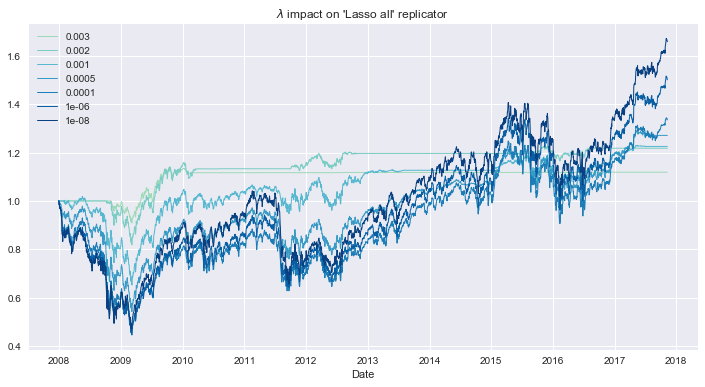

In [26]:
colors = plt.cm.GnBu(np.linspace(0.4, 1, 7))
ax = df_l[['0.003', '0.002', '0.001', '0.0005', '0.0001', '1e-06', '1e-08']].plot(figsize=(12, 6), linewidth=1, color=colors, title="$\lambda$ impact on 'Lasso all' replicator")

In [27]:
returns_track = df_l.pct_change().dropna()
corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU')
feu = returns_track['BNPIFEU']
returns_track = returns_track.drop('BNPIFEU', axis=1)
df = pd.DataFrame()
df['Tracking error'] = (returns_track.T - feu.values).std(axis=1)
df['R-squared'] = 1 - (returns_track.T - feu.values).var(axis=1) / feu.values.var()
df['Correlation'] = corr.T
df.index = [np.float(x) for x in corr.index.values]

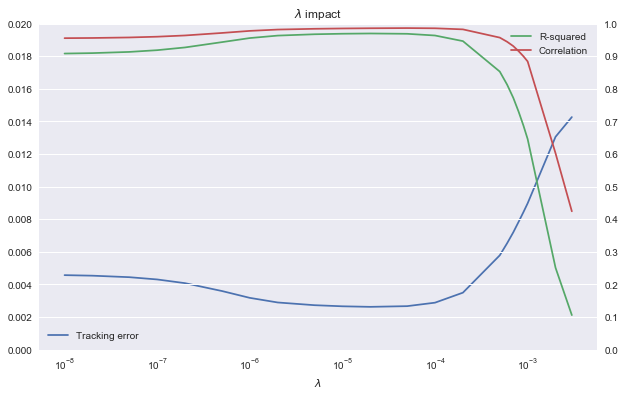

In [28]:
ax=df.plot(figsize=(10, 6), logx=True, secondary_y=["R-squared", "Correlation"], title="$\lambda$ impact", ylim=[0.00,0.020])
ax.legend(loc=3)
ax.set_xlabel('$\lambda$')
plt.legend(loc=1)
plt.ylim(0,1)
plt.locator_params(axis='y', nbins=10)
ax.locator_params(axis='y', nbins=10)

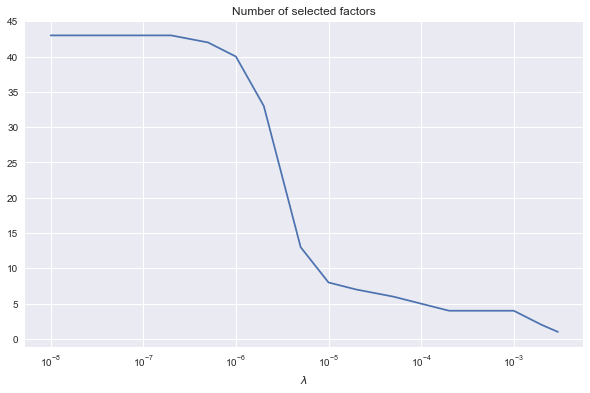

In [29]:
weights = {}
for l in weights_l.keys():
    df_weights = weights_l[l]
    n = len(df_weights.index)
    weights[l] = np.sum((np.abs(df_weights).mean() > 0.02))
w = pd.DataFrame.from_dict(weights, orient='index')
w.index = [np.float(x) for x in w.index.values]
ax = w[0].sort_index().plot(logx=True, figsize=(10, 6), title="Number of selected factors", label=False)
ax.set_xlabel('$\lambda$')
ax.locator_params(axis='y', nbins=10)

# Ridge gamma impact

In [30]:
df_r = df_res[['BNPIFEU']].copy()
weights_r = {}

In [31]:
for l in [100, 50, 20, 10, 5, 2, 1, 7e-1, 5e-1, 2e-1, 1e-1, 7e-2, 5e-2, 4e-2, 3e-2, 2e-2, 1e-2, 9e-3, 8e-3, 7e-3, 6e-3, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5, 5e-6, 2e-6, 1e-6, 5e-7, 2e-7, 1e-7]:
    weight_ridge = ridge_regression(sx5e, bch_all, size, freq, l=l)
    replication_ridge = make_track(prices_for_track_all, weight_ridge)
    df_r[str(l)] = replication_ridge
    weights_r[str(l)] = weight_ridge

In [32]:
df_r = df_r / df_r.iloc[0]

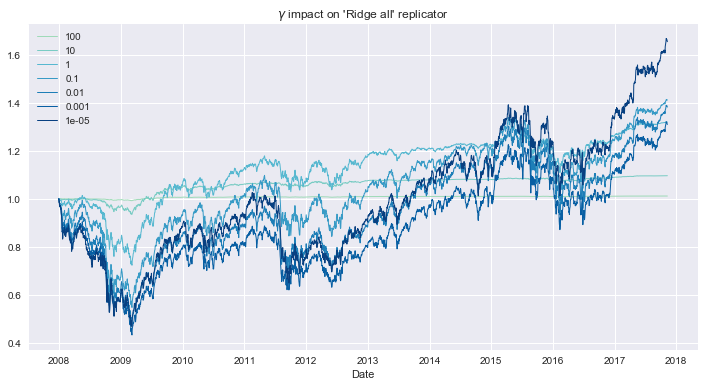

In [33]:
colors = plt.cm.GnBu(np.linspace(0.4, 1, 7))
ax = df_r[['100', '10', '1', '0.1', '0.01', '0.001', '1e-05']].plot(figsize=(12, 6), linewidth=1, color=colors, title="$\gamma$ impact on 'Ridge all' replicator")

In [34]:
returns_track = df_r.pct_change().dropna()
corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU')
feu = returns_track['BNPIFEU']
returns_track = returns_track.drop('BNPIFEU', axis=1)
df = pd.DataFrame()
df['Tracking error'] = (returns_track.T - feu.values).std(axis=1)
df['R-squared'] = 1 - (returns_track.T - feu.values).var(axis=1) / feu.values.var()
df['Correlation'] = corr.T
df.index = [np.float(x) for x in corr.index.values]

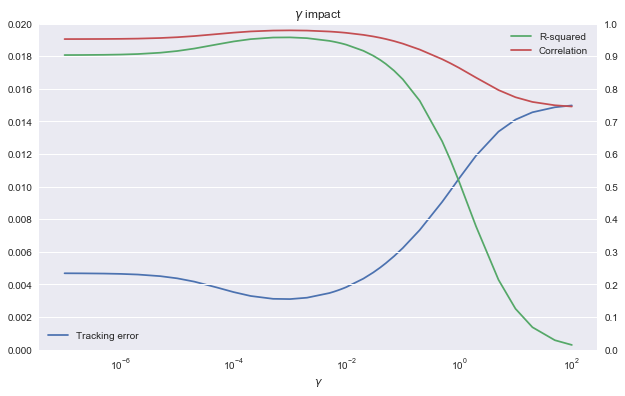

In [35]:
ax=df.plot(figsize=(10, 6), logx=True, secondary_y=["R-squared", "Correlation"], title="$\gamma$ impact", ylim=[0.00,0.020])
ax.legend(loc=3)
ax.set_xlabel('$\gamma$')
plt.legend(loc=1)
plt.ylim(0,1)
plt.locator_params(axis='y', nbins=10)
ax.locator_params(axis='y', nbins=10)

Text(0.5,0,'$\\gamma$')

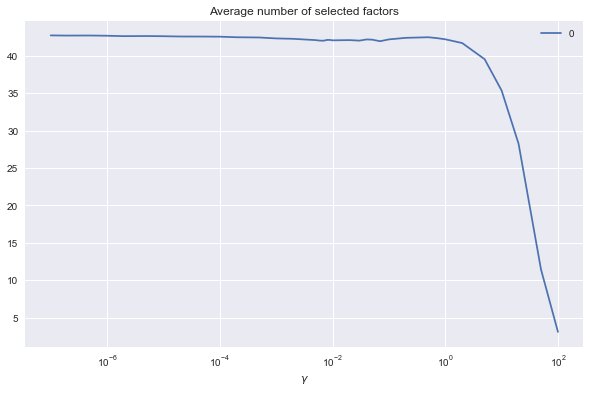

In [36]:
weights = {}
for l in weights_r.keys():
    df_weights = weights_r[l]
    n = len(df_weights.index)
    weights[l] = np.sum((np.abs(df_weights) > 0.001).sum()) / n
w = pd.DataFrame.from_dict(weights, orient='index')
w.index = [np.float(x) for x in w.index.values]
ax = w.sort_index().plot(logx=True, figsize=(10, 6), title="Average number of selected factors")
ax.set_xlabel('$\gamma$')

# Ridge Noise impact

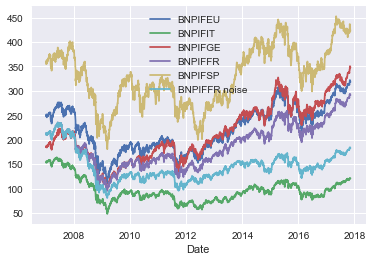

In [37]:
prices_noise = prices.copy()
FFR_noise = [prices_noise['BNPIFFR'].iloc[0]]
for i in range(len(prices_noise.index)-1):
    if (i//(5*size))%2==0: a = 0.0001
    else: a = 0.005
    FFR_noise.append(FFR_noise[i] * (prices_noise['BNPIFFR'].iloc[i+1] / prices_noise['BNPIFFR'].iloc[i] + a * np.random.normal()))
prices_noise['BNPIFFR noise'] = FFR_noise
prices_noise.plot()
returns_noise = prices_noise.resample("7D").first().pct_change().dropna()

In [38]:
sx5e = returns_noise[["BNPIFEU"]]
bch = returns_noise.drop("BNPIFEU", axis=1)

size = 52
freq = 52

In [39]:
df_weight_noise = ols_regression(sx5e, bch, size, freq)

prices_for_track = prices_noise.loc[df_weight.index[0]:].drop("BNPIFEU", axis=1)

replication_noise = make_track(prices_for_track, df_weight_noise)
df_res["OLS noise"] = replication_noise

In [40]:
df_weight_ridge_noise = ridge_regression(sx5e, bch, size, freq, l=1e-3)

replication_ridge_noise = make_track(prices_for_track, df_weight_ridge_noise)
df_res["Ridge noise"] = replication_ridge_noise

In [41]:
df_weight_kalman_noise = kalman_filter(sx5e, bch, freq, sigma_weight=0.05, sigma_return=0.005)

replication_kalman_noise = make_track(prices_for_track, df_weight_kalman_noise)
df_res["Kalman noise"] = replication_kalman_noise

In [42]:
df_res = df_res / df_res.iloc[0]

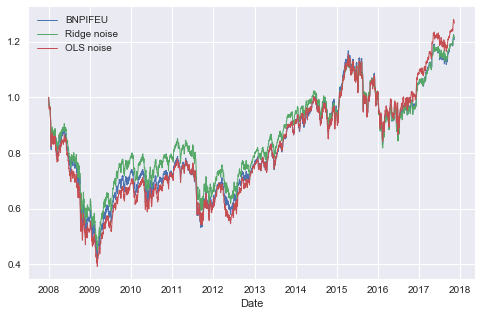

In [43]:
df_res[['BNPIFEU', 'Ridge noise', 'OLS noise']].plot(figsize=(8,5),linewidth=1)

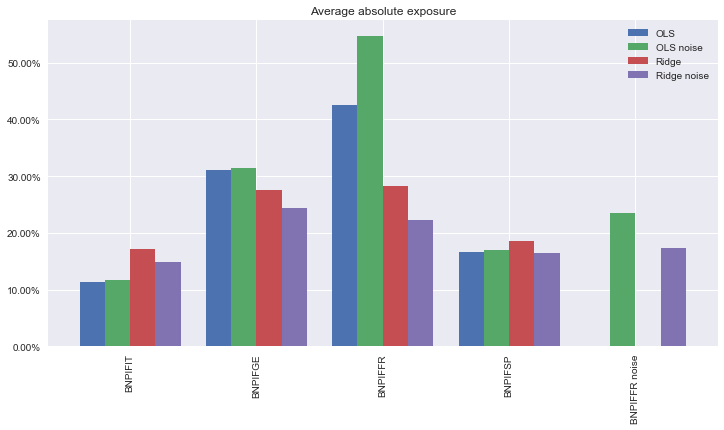

In [44]:
weight_noise = pd.DataFrame(data={'OLS noise': np.abs(df_weight_noise).mean(axis=0)})
weight_noise.insert(0, 'OLS', np.abs(df_weight).mean(axis=0))
weight_noise['Ridge'] = np.abs(df_weight_ridge).mean(axis=0)
weight_noise['Ridge noise'] = np.abs(df_weight_ridge_noise).mean(axis=0)
ax = weight_noise.plot(kind='bar', title='Average absolute exposure', figsize=(12, 6), width=0.8)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
plt.show()

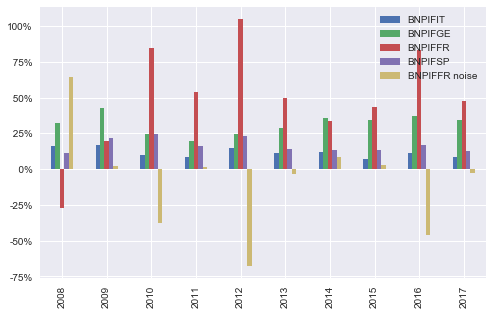

In [45]:
ax = df_weight_noise.plot(kind='bar', figsize=(8,5))
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
_ = ax.set_xticklabels([2008 + x for x in vals])

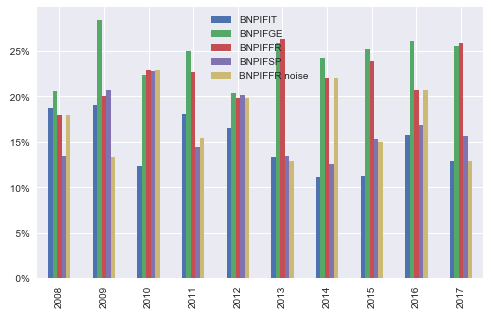

In [46]:
ax = df_weight_ridge_noise.plot(kind='bar', figsize=(8,5))
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
vals = ax.get_xticks()
_ = ax.set_xticklabels([2008 + x for x in vals])


# Kalman Filter parameters

In [47]:
df_k = prices.loc[replication.index][["BNPIFEU"]]
df_k = df_k / df_k.iloc[0]
sx5e = returns_all[["BNPIFEU"]]
bch = returns.drop("BNPIFEU", axis=1)
bch_all = returns_all.drop("BNPIFEU", axis=1)

In [48]:
nsteps = 20
sigma_return_list = np.linspace(0.05, 0, nsteps, endpoint=False)
sigma_weight_list = np.linspace(.5, 0, nsteps, endpoint=False)
te_2 = pd.DataFrame(index=sigma_weight_list)
r2_2 = pd.DataFrame(index=sigma_weight_list)
correl_2 = pd.DataFrame(index=sigma_weight_list)

for sigma_weight in sigma_weight_list:
    for sigma_return in sigma_return_list:
        df_weight_kalman = kalman_filter(sx5e, bch, freq, sigma_weight=sigma_weight, sigma_return=sigma_return)
        prices_for_track_kalman = prices.loc[df_weight_kalman.index[0]:].drop("BNPIFEU", axis=1)
        replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman).loc[df_weight.index[0]:]
        df_k['Kalman'] = replication_kalman
        
        returns_track = df_k.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_2.loc[sigma_weight,sigma_return] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_2.loc[sigma_weight,sigma_return] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_2.loc[sigma_weight,sigma_return] = corr

te_2 = te_2.reindex_axis(sorted(te_2.columns), axis=1).sort_index(ascending=False)
r2_2 = r2_2.reindex_axis(sorted(r2_2.columns), axis=1).sort_index(ascending=False)
correl_2 = correl_2.reindex_axis(sorted(correl_2.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(34,0.5,'$\\sigma_\\eta$')

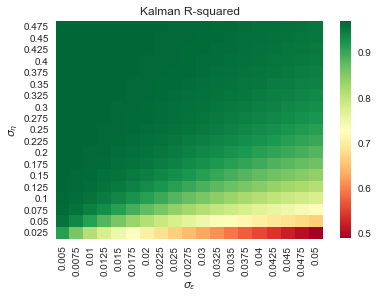

In [49]:
ax = sns.heatmap(r2_2.iloc[1:,1:], cmap='RdYlGn')
ax.set_title('Kalman R-squared')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")

Text(34,0.5,'$\\sigma_\\eta$')

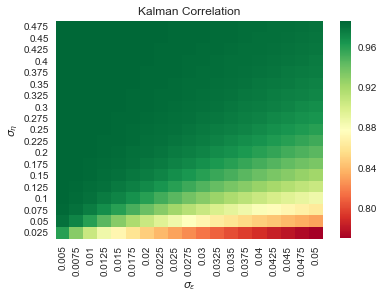

In [50]:
ax = sns.heatmap(correl_2.iloc[1:,1:], cmap='RdYlGn')
ax.set_title('Kalman Correlation')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")

Text(34,0.5,'$\\sigma_\\eta$')

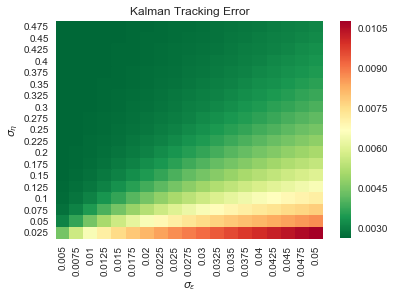

In [51]:
ax = sns.heatmap(te_2.iloc[1:,1:], cmap='RdYlGn_r')
ax.set_title('Kalman Tracking Error')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")

In [52]:
nsteps = 20
sigma_return_list = np.linspace(0.05, 0, nsteps, endpoint=False)
sigma_weight_list = np.linspace(.5, 0, nsteps, endpoint=False)
te_2_all = pd.DataFrame(index=sigma_weight_list)
r2_2_all = pd.DataFrame(index=sigma_weight_list)
correl_2_all = pd.DataFrame(index=sigma_weight_list)

for sigma_weight in sigma_weight_list:
    for sigma_return in sigma_return_list:
        df_weight_kalman = kalman_filter(sx5e, bch_all, freq, sigma_weight=sigma_weight, sigma_return=sigma_return)
        prices_for_track_kalman = prices_all.loc[df_weight_kalman.index[0]:].drop("BNPIFEU", axis=1)
        replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman).loc[df_weight.index[0]:]
        df_k['Kalman'] = replication_kalman
        
        returns_track = df_k.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_2_all.loc[sigma_weight,sigma_return] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_2_all.loc[sigma_weight,sigma_return] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_2_all.loc[sigma_weight,sigma_return] = corr

te_2_all = te_2_all.reindex_axis(sorted(te_2_all.columns), axis=1).sort_index(ascending=False)
r2_2_all = r2_2_all.reindex_axis(sorted(r2_2_all.columns), axis=1).sort_index(ascending=False)
correl_2_all = correl_2_all.reindex_axis(sorted(correl_2_all.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(34,0.5,'$\\sigma_\\eta$')

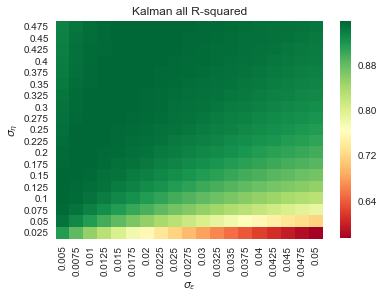

In [53]:
ax = sns.heatmap(r2_2_all.iloc[1:,1:], cmap='RdYlGn')
ax.set_title('Kalman all R-squared')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")

Text(34,0.5,'$\\sigma_\\eta$')

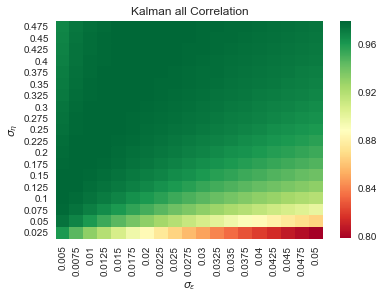

In [54]:
ax = sns.heatmap(correl_2_all.iloc[1:,1:], cmap='RdYlGn')
ax.set_title('Kalman all Correlation')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")

Text(34,0.5,'$\\sigma_\\eta$')

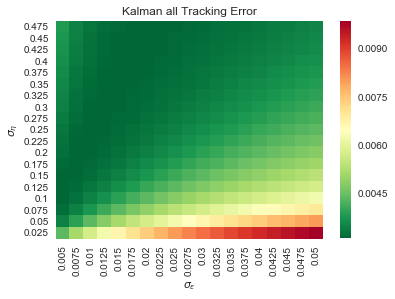

In [55]:
ax = sns.heatmap(te_2_all.iloc[1:,1:], cmap='RdYlGn_r')
ax.set_title('Kalman all Tracking Error')
ax.set_xlabel("$\sigma_\epsilon$")
ax.set_ylabel("$\sigma_\eta$")


# Impact of Lookback period and rebalancing frequency

In [56]:
df_o = prices.loc[replication.index][["BNPIFEU"]]

In [25]:
prices_lg = pd.read_csv(r"financial_data/bnp_data_long_term.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU','BNPIFIT',
                            'BNPIFGE', 'BNPIFFR', 'BNPIFSP']]
prices_lg_all = pd.read_csv(r"financial_data/bnp_data_long_term.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU',
                            'BNPIFUS', 'BNPIFJP', 'BNPIFCN', 'BNPIFFR', 'BNPIFGE', 'BNPIFGB', 'BNPIFCH', 'BNPIFKR',
                            'BNPIFUSC', 'BNPIFBR', 'BNPIFAU', 'BNPIFHK', 'BNPIFTW', 'BNPIFSG', 'BNPIFIT', 'BNPIFSP',
                            'BNPIFSW', 'BNPIFNE', 'BNPIFRU', 'BNPIFEM', 'BNPIFJT', 'BPFXEUR1', 'BPFXGBP1', 'BPFXCHF1',
                            'BPFXJPY1', 'BPFXAUD1', 'BPFXNZD1', 'BPFXNOK1', 'BPFXSEK1', 'BPFXCAD1', 'BPFXCZK1',
                            'BPFXPLN1', 'BPFXHUF1', 'BPFXTRY1', 'BPFXZAR1', 'BPFXSGD1', 'BPFXMXN1', 'BPFXINR1',
                            'BPFXKRW1', 'BPFXPHP1', 'BPFXTWD1', 'BPFXBRL1', 'BPFXCLP1', 'BPFXCOP1']]

### OLS

In [58]:
returns_lg = prices_lg.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 250, 5)
freq_list = range(2, 105, 2)

te_ols = pd.DataFrame(index=freq_list)
r2_ols = pd.DataFrame(index=freq_list)
correl_ols = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_ols = ols_regression(sx5e_lg, bch_lg, lookback, frequency)
        replication_ols = make_track(prices_for_track_lg, df_weight_ols)
        df_o['OLS'] = replication_ols
        
        returns_track = df_o.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_ols.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_ols.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_ols.loc[frequency, lookback] = corr
        
te_ols = te_ols.reindex_axis(sorted(te_ols.columns), axis=1).sort_index(ascending=False)
r2_ols = r2_ols.reindex_axis(sorted(r2_ols.columns), axis=1).sort_index(ascending=False)
correl_ols = correl_ols.reindex_axis(sorted(correl_ols.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

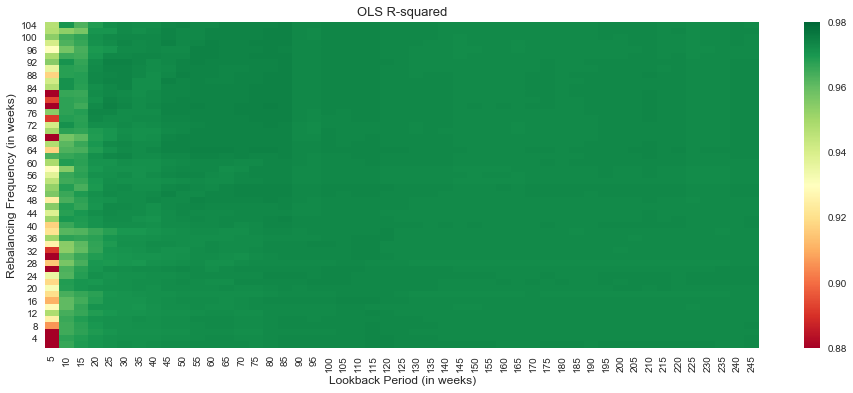

In [59]:
vmin = 0.88
vmax = 0.98
center = (vmin + vmax) / 2.
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_ols, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('OLS R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

In [60]:
returns_lg = prices_lg_all.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg_all.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 250, 5)
freq_list = range(2, 105, 2)

te_ols_all = pd.DataFrame(index=freq_list)
r2_ols_all = pd.DataFrame(index=freq_list)
correl_ols_all = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_ols = ols_regression(sx5e_lg, bch_lg, lookback, frequency)
        replication_ols = make_track(prices_for_track_lg, df_weight_ols)
        df_o['OLS'] = replication_ols
        
        returns_track = df_o.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_ols_all.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_ols_all.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_ols_all.loc[frequency, lookback] = corr
        
te_ols_all = te_ols_all.reindex_axis(sorted(te_ols_all.columns), axis=1).sort_index(ascending=False)
r2_ols_all = r2_ols_all.reindex_axis(sorted(r2_ols_all.columns), axis=1).sort_index(ascending=False)
correl_ols_all = correl_ols_all.reindex_axis(sorted(correl_ols_all.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

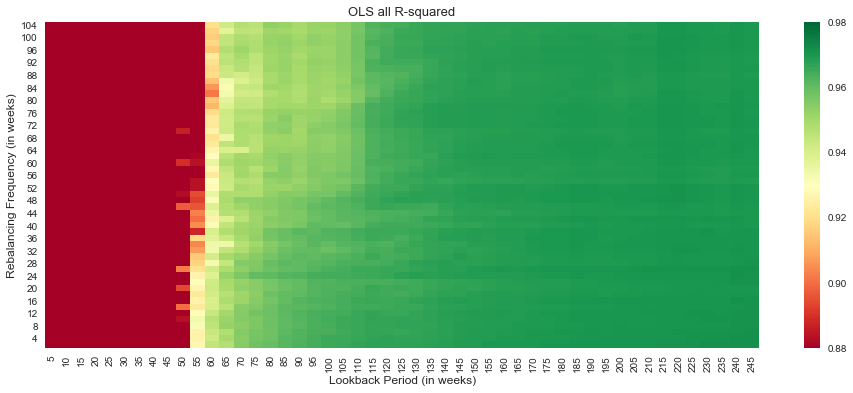

In [61]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_ols_all, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('OLS all R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

### Ridge

In [62]:
df_r = prices.loc[replication.index][["BNPIFEU"]]

returns_lg = prices_lg.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 250, 5)
freq_list = range(2, 105, 2)

te_ridge = pd.DataFrame(index=freq_list)
r2_ridge = pd.DataFrame(index=freq_list)
correl_ridge = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_ridge = ridge_regression(sx5e_lg, bch_lg, lookback, frequency, l=1e-3)
        replication_ridge = make_track(prices_for_track_lg, df_weight_ridge)
        df_r['Ridge'] = replication_ridge
        
        returns_track = df_r.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_ridge.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_ridge.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_ridge.loc[frequency, lookback] = corr
        
te_ridge = te_ridge.reindex_axis(sorted(te_ridge.columns), axis=1).sort_index(ascending=False)
r2_ridge = r2_ridge.reindex_axis(sorted(r2_ridge.columns), axis=1).sort_index(ascending=False)
correl_ridge = correl_ridge.reindex_axis(sorted(correl_ridge.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

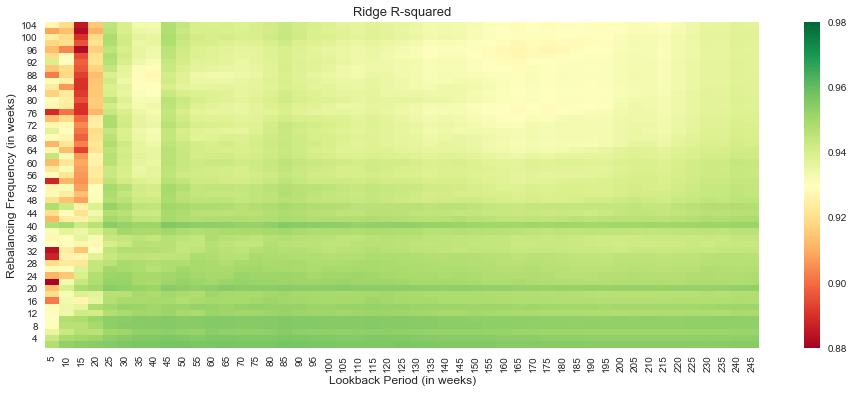

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_ridge, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Ridge R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

In [8]:
returns_lg = prices_lg_all.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg_all.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 250, 5)
freq_list = range(2, 105, 2)

te_ridge_all = pd.DataFrame(index=freq_list)
r2_ridge_all = pd.DataFrame(index=freq_list)
correl_ridge_all = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_ridge = ridge_regression(sx5e_lg, bch_lg, lookback, frequency, l=1e-3)
        replication_ridge = make_track(prices_for_track_lg, df_weight_ridge)
        df_r['Ridge'] = replication_ridge
        
        returns_track = df_r.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_ridge_all.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_ridge_all.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_ridge_all.loc[frequency, lookback] = corr
        
te_ridge_all = te_ridge_all.reindex_axis(sorted(te_ridge_all.columns), axis=1).sort_index(ascending=False)
r2_ridge_all = r2_ridge_all.reindex_axis(sorted(r2_ridge_all.columns), axis=1).sort_index(ascending=False)
correl_ridge_all = correl_ridge_all.reindex_axis(sorted(correl_ridge_all.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

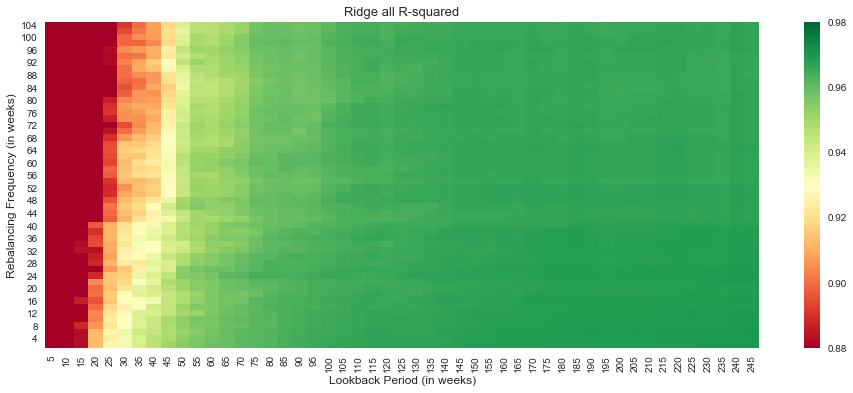

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_ridge_all, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Ridge all R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

### Lasso

In [12]:
df_l = prices.loc[replication.index][["BNPIFEU"]]

returns_lg = prices_lg_all.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg_all.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 251, 5)
freq_list = range(2, 105, 2)

te_lasso_all = pd.DataFrame(index=freq_list)
r2_lasso_all = pd.DataFrame(index=freq_list)
correl_lasso_all = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_lasso = lasso_regression(sx5e_lg, bch_lg, lookback, frequency, l=5e-5)
        replication_lasso = make_track(prices_for_track_lg, df_weight_lasso)
        df_l['Lasso'] = replication_lasso
        
        returns_track = df_l.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_lasso_all.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_lasso_all.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_lasso_all.loc[frequency, lookback] = corr
        
te_lasso_all = te_lasso_all.reindex_axis(sorted(te_lasso_all.columns), axis=1).sort_index(ascending=False)
r2_lasso_all = r2_lasso_all.reindex_axis(sorted(r2_lasso_all.columns), axis=1).sort_index(ascending=False)
correl_lasso_all = correl_lasso_all.reindex_axis(sorted(correl_lasso_all.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

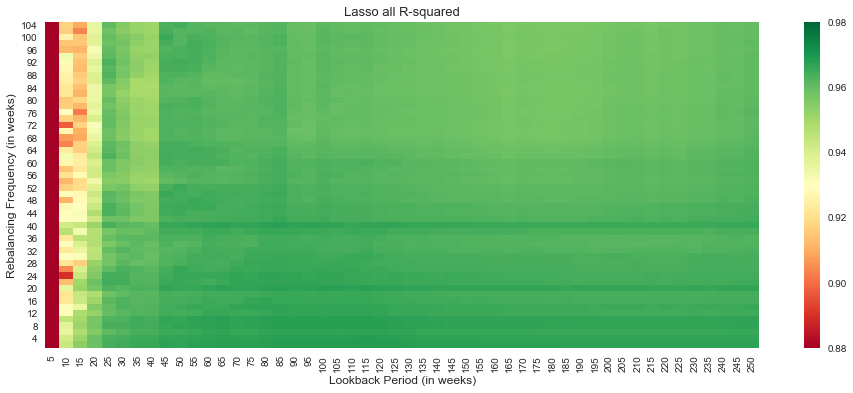

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_lasso_all, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Lasso all R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

In [14]:
df_l = prices.loc[replication.index][["BNPIFEU"]]

returns_lg = prices_lg.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 251, 5)
freq_list = range(2, 105, 2)

te_lasso = pd.DataFrame(index=freq_list)
r2_lasso = pd.DataFrame(index=freq_list)
correl_lasso = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_lasso = lasso_regression(sx5e_lg, bch_lg, lookback, frequency, l=5e-5)
        replication_lasso = make_track(prices_for_track_lg, df_weight_lasso)
        df_l['Lasso'] = replication_lasso
        
        returns_track = df_l.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_lasso.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_lasso.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_lasso.loc[frequency, lookback] = corr
        
te_lasso = te_lasso.reindex_axis(sorted(te_lasso.columns), axis=1).sort_index(ascending=False)
r2_lasso = r2_lasso.reindex_axis(sorted(r2_lasso.columns), axis=1).sort_index(ascending=False)
correl_lasso = correl_lasso.reindex_axis(sorted(correl_lasso.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

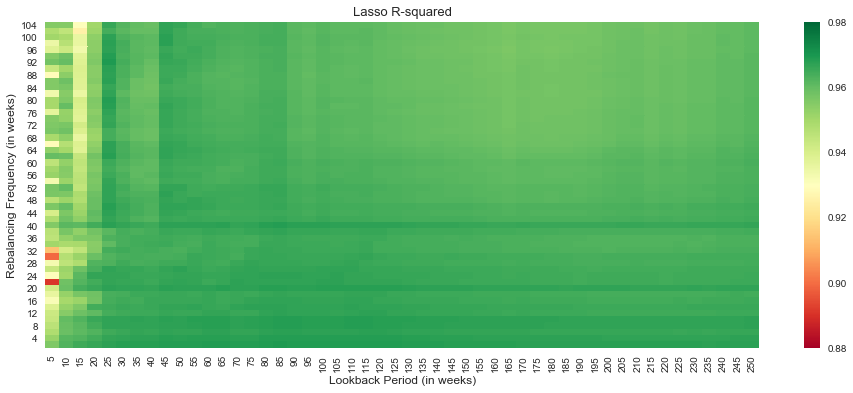

In [15]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_lasso, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Lasso R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

In [16]:
df_l = prices.loc[replication.index][["BNPIFEU"]]

returns_lg = prices_lg_all.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg_all.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 251, 5)
freq_list = range(2, 105, 2)

te_lasso_aic = pd.DataFrame(index=freq_list)
r2_lasso_aic = pd.DataFrame(index=freq_list)
correl_lasso_aic = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_lasso, _ = lasso_regression_ic(sx5e_lg, bch_lg, lookback, frequency, criterion='aic', plot_lambda=False)
        replication_lasso = make_track(prices_for_track_lg, df_weight_lasso)
        df_l['Lasso'] = replication_lasso
        
        returns_track = df_l.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_lasso_aic.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_lasso_aic.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_lasso_aic.loc[frequency, lookback] = corr
        
te_lasso_aic = te_lasso_aic.reindex_axis(sorted(te_lasso_aic.columns), axis=1).sort_index(ascending=False)
r2_lasso_aic = r2_lasso_aic.reindex_axis(sorted(r2_lasso_aic.columns), axis=1).sort_index(ascending=False)
correl_lasso_aic = correl_lasso_aic.reindex_axis(sorted(correl_lasso_aic.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

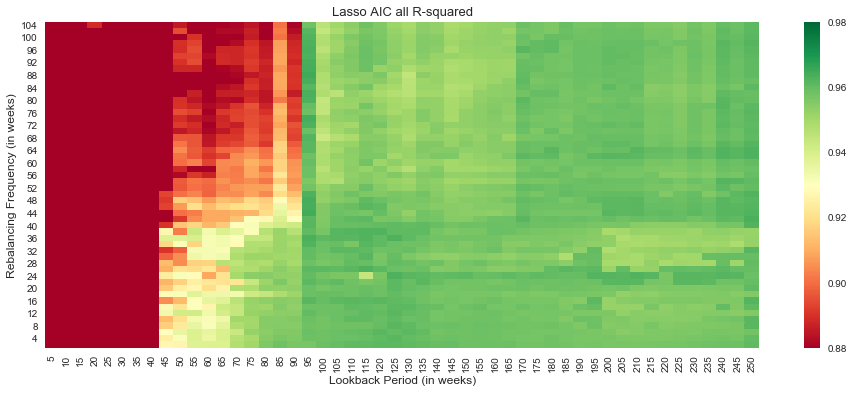

In [17]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_lasso_aic, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Lasso AIC all R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)

In [27]:
df_l = prices.loc[replication.index][["BNPIFEU"]]

returns_lg = prices_lg_all.resample("7D").first().pct_change().dropna()
prices_for_track_lg = prices_lg_all.iloc[-2570:].drop("BNPIFEU", axis=1)


lookback_list = range(5, 251, 5)
freq_list = range(2, 105, 2)

te_lasso_bic = pd.DataFrame(index=freq_list)
r2_lasso_bic = pd.DataFrame(index=freq_list)
correl_lasso_bic = pd.DataFrame(index=freq_list)

for lookback in lookback_list:
    sx5e_lg = returns_lg[["BNPIFEU"]].iloc[-513-lookback:]
    bch_lg = returns_lg.drop("BNPIFEU", axis=1).iloc[-513-lookback:]
    
    for frequency in freq_list:
        
        df_weight_lasso, _ = lasso_regression_ic(sx5e_lg, bch_lg, lookback, frequency, criterion='bic', plot_lambda=False)
        replication_lasso = make_track(prices_for_track_lg, df_weight_lasso)
        df_l['Lasso'] = replication_lasso
        
        returns_track = df_l.pct_change().dropna()
        corr = returns_track.corr(method="pearson")['BNPIFEU'].drop('BNPIFEU').iloc[0]
        feu = returns_track['BNPIFEU']
        returns_track = returns_track.drop('BNPIFEU', axis=1)
        
        te_lasso_bic.loc[frequency, lookback] = (returns_track.T - feu.values).std(axis=1).iloc[0]
        r2_lasso_bic.loc[frequency, lookback] = 1 - ((returns_track.T - feu.values).var(axis=1) / feu.values.var()).iloc[0]
        correl_lasso_bic.loc[frequency, lookback] = corr
        
te_lasso_bic = te_lasso_bic.reindex_axis(sorted(te_lasso_bic.columns), axis=1).sort_index(ascending=False)
r2_lasso_bic = r2_lasso_bic.reindex_axis(sorted(r2_lasso_bic.columns), axis=1).sort_index(ascending=False)
correl_lasso_bic = correl_lasso_bic.reindex_axis(sorted(correl_lasso_bic.columns), axis=1).sort_index(ascending=False)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


Text(124,0.5,'Rebalancing Frequency (in weeks)')

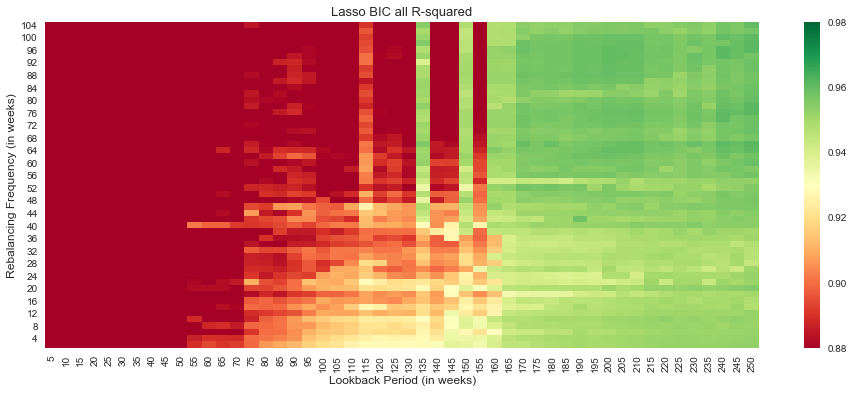

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(r2_lasso_bic, ax=ax, cmap='RdYlGn', vmin=vmin, vmax=vmax, center=center)
ax.set_title('Lasso BIC all R-squared', fontsize=13)
ax.set_xlabel("Lookback Period (in weeks)", fontsize=12)
ax.set_ylabel("Rebalancing Frequency (in weeks)", fontsize=12)